<a href="https://colab.research.google.com/github/sayan0506/Classifying-Cityscape-data-using-Pretrained-Resnet-18-model-using-Discriminative-Learning/blob/main/Pretrained_Resnet_18_with_Discriminative_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modules import**

In [28]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from matplotlib import pyplot as plt
from PIL import Image

# for unzipping
import zipfile

# this makes pyplot in interactive mode
plt.ion()

# **Loading the Cityscape imagepairs dataset from Kaggle**

Get multiple target image and label pairs

**Steps to download the dataset in collab**

1. Go to kaggle account, scroll to **API section**, and Click **Expire API Token** to remove previous tokens
2. Click on **Create New API Token**, it will download **kaggle.json** file on the machine
3. Go to google collab project notebook and run following commands in code shell


* Install Kaggle dependencies

In [2]:
# install the dependencies
!pip install kaggle

* import google.colab.files
* files.upload
* Choose the downloaded **kaggle.json**, and upload into collab

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sayanhazra05","key":"038235153b6e88572467ff31dbc34db3"}'}

* Run to create new directory named kaggle
>**!mkdir -p ~/.kaggle**
* Run this to copy kaggle.json into the directory
>**!cp kaggle.json ~/.kaggle/** 
* Run this to change the permission
>**!chmod 600 ~/.kaggle/kaggle.json** 

In [5]:
# create kaggle directory
!mkdir -p ~/.kaggle
# copy kaggle,json in the directory
!cp kaggle.json ~/.kaggle/

# change the permission
!chmod 600 ~/.kaggle/kaggle.json

* **Download the dataset**(follow general steps or run the command for now)
* Go to kaggle, search the competition, here **"Cityscapes Image Pairs"**, open it, navigate to marked section for selection


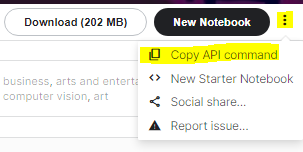

* **Click on copy API command**, for this Cityscapes dataset run the following
>**!kaggle datasets download -d dansbecker/cityscapes-image-pairs**
* **Note:** If normal download does not work, uncomment and run the folllowing to force download
>**!kaggle datasets download --force dansbecker/cityscapes-image-pairs** 
* Download the zip file named **"cityscapes-image-pairs.zip"**

In [7]:
# download the dataset
!kaggle datasets download --force dansbecker/cityscapes-image-pairs

# force download if normal download does not work
#!kaggle datasets download --force dansbecker/cityscapes-image-pairs 

 96% 193M/202M [00:02<00:00, 85.0MB/s]
100% 202M/202M [00:02<00:00, 91.2MB/s]


# Data Preperation

## Unzipping

In [8]:
if not os.path.isdir('/content/Cityscape'):
  os.mkdir('/content/Cityscape')


# path of zip
path_to_zip = '/content/cityscapes-image-pairs.zip'
# directory to which unzipped 
unzip_dir = '/content/Cityscape'

with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
  zip_ref.extractall(unzip_dir)

## Data Inspection

In [14]:
# cityscape data directory
data_dir = '/content/Cityscape/cityscapes_data'

# train directory
train_dir = os.path.join(data_dir, 'train')

# validation directory
val_dir = os.path.join(data_dir, 'val')

print(f'Train directory {train_dir}\nValidation directory {val_dir}\n')

# train, validation samples list
train_samples, validation_samples = os.listdir(train_dir), os.listdir(val_dir)
print(f'Total Training image pairs {len(train_samples)}\nTotal Validation image pairs {len(validation_samples)}')

Train directory /content/Cityscape/cityscapes_data/train
Validation directory /content/Cityscape/cityscapes_data/val

Total Training image pairs 2975
Total Validation image pairs 500


**Sample Visualization**

Visualizing 3 sample images in a row for train and valid set

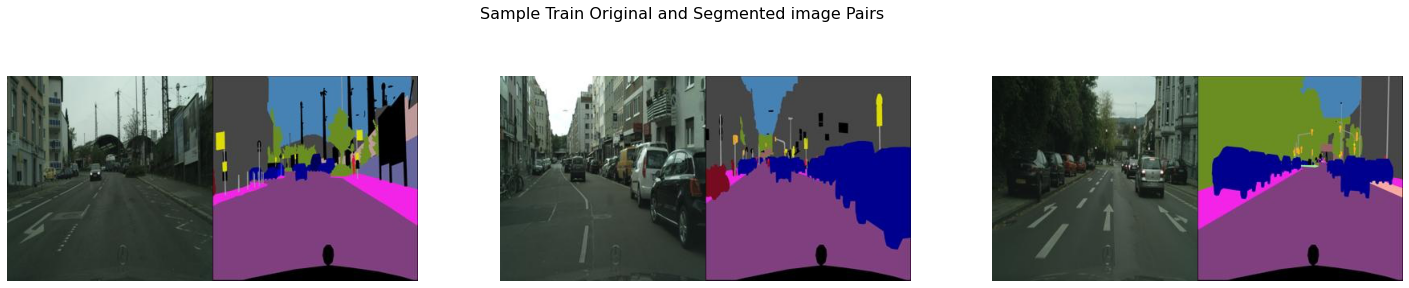

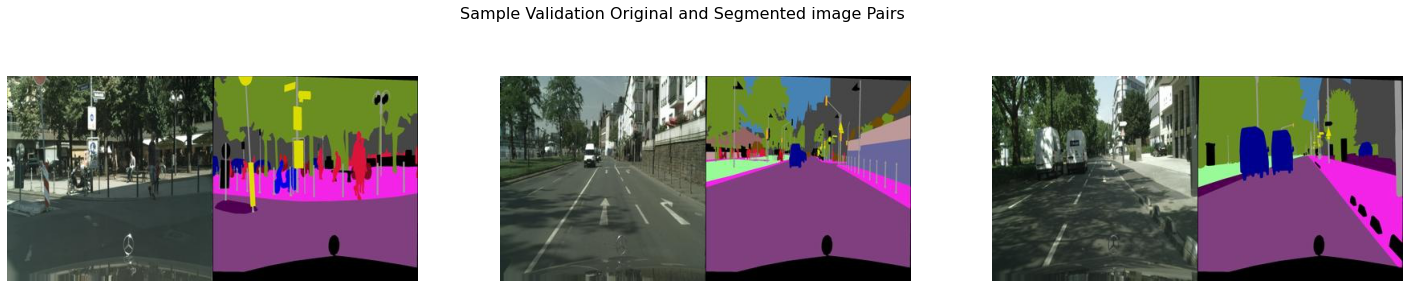

In [39]:
def img_vis(lst=None,title=None):
  
  path, img_list= lst
  # defining pyplot figure
  fig = plt.figure(figsize=(25,5))
  fig.suptitle(title, fontsize = 16)
  for i in range(3):
    sample = Image.open(os.path.join(path, img_list[i])).convert('RGB')
    fig.add_subplot(1,3,i+1)
    plt.imshow(sample)
    plt.axis('off')
  plt.show()
    

# fig_title list
title = ['Sample Train Original and Segmented image Pairs', 'Sample Validation Original and Segmented image Pairs']
#directory list
dir_list = [train_dir, val_dir]
# image list
img_list = [train_samples, validation_samples]
for i, lst in enumerate(zip(dir_list, img_list)):
  img_vis(lst = lst, title = title[i])



In [19]:
len(img_list)

2